In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data=pd.read_csv('Employee.csv')
data.head()

,Education,JoiningYear,City,Projects Completed,Age,Gender,EverBenched,Experience,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [40]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [41]:
x.head(2)

,Education,JoiningYear,City,Projects Completed,Age,Gender,EverBenched,Experience
0,Bachelors,2017,Bangalore,3,34,Male,No,0
1,Bachelors,2013,Pune,1,28,Female,No,3


In [42]:
y.head(2)

0    0
1    1
Name: LeaveOrNot, dtype: int64

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming 'data' is a pandas DataFrame containing the dataset
# 'employee_performance' is the target variable

# Selecting relevant features and target variable
features = ['Age', 'Experience']  # These are sample features, replace with actual ones
x = data[features]
y = data['Projects Completed']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Building the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predicting employee performance
y_pred = model.predict(x_test)

# Model evaluation (Using Mean Squared Error as an example)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.2927365238557307


In [44]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

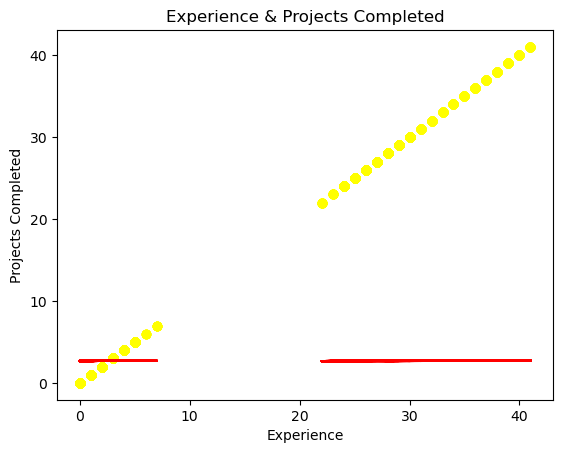

In [45]:
plt.scatter(x_train,x_train,color='yellow')
plt.plot(x_train,lin_reg.predict(x_train),color='red')
plt.xlabel('Experience')
plt.ylabel('Projects Completed')
plt.title('Experience & Projects Completed')
plt.show()

In [55]:
# Assuming 'model' is the existing linear regression model and 'residuals' are the model residuals

# Option 1: Variable Transformation
# Let's apply a log transformation to the target variable 'y' to stabilize variance
y_transformed = np.log(y)

# Rebuild the model with the transformed target variable
model.fit(x, y_transformed)
# Evaluate the model and check for heteroscedasticity in the residuals

# Option 2: Weighted Least Squares Regression
# Using statsmodels for WLS regression
import statsmodels.api as sm
weights = 1/(ProjectsCompleted* 2)  # Assigning weights based on the variance of residuals
wls_model = sm.WLS(y, x, weights=weights)
results = wls_model.fit()
print(results.summary())
# Evaluate and compare the model performance

# Option 3: Robust Standard Errors
robust_model = sm.OLS(y, x).fit(cov_type='HC3')  # HC3 for robust standard errors
print(robust_model.summary())
# Assess the impact on standard errors and statistical inferences


NameError: name 'ProjectsCompleted' is not defined